In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = 'https://drive.google.com/file/d/1VD06DjyGegNAWdJxFqKW-BtNsSbZsbez/view?usp=drive_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Axes: >

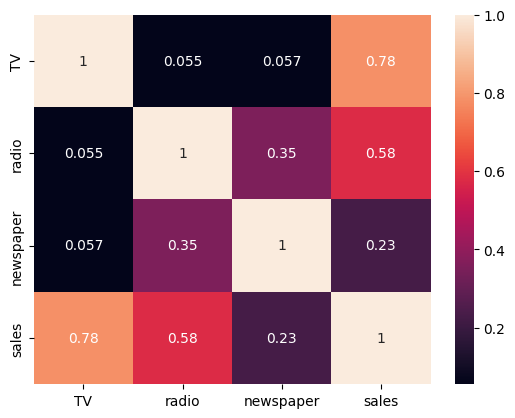

In [7]:
sns.heatmap(df.corr() , annot=True)

In [33]:
X = df.drop('sales' , axis=1)
y = df['sales']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
from sklearn.svm import SVR

In [51]:
svr = SVR()

In [40]:
operations = [('scaler',scaler),('svr',svr)]

In [41]:
from sklearn.pipeline import Pipeline

In [42]:
pipe = Pipeline(operations)

In [43]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = {'svr__kernel':['linear','rbf','poly'] , 'svr__C':[0.01,0.1,1] , 'svr__epsilon':[0,0.01,0.1,1]}

In [79]:
grid = GridSearchCV(pipe,param_grid)

In [80]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.01, 0.1, 1],
                         'svr__epsilon': [0, 0.01, 0.1, 1],
                         'svr__kernel': ['linear', 'rbf', 'poly']})

In [81]:
grid.best_params_

{'svr__C': 1, 'svr__epsilon': 1, 'svr__kernel': 'linear'}

In [82]:
svr = SVR(kernel='linear' , C=1 , epsilon=1)

In [83]:
svr.fit(X_train,y_train)

SVR(C=1, epsilon=1, kernel='linear')

In [84]:
svr.coef_

array([[ 0.04134431,  0.19015588, -0.00079206]])

In [85]:
y_pred = svr.predict(X_test)

In [86]:
res = y_test-y_pred

<Axes: xlabel='sales', ylabel='Count'>

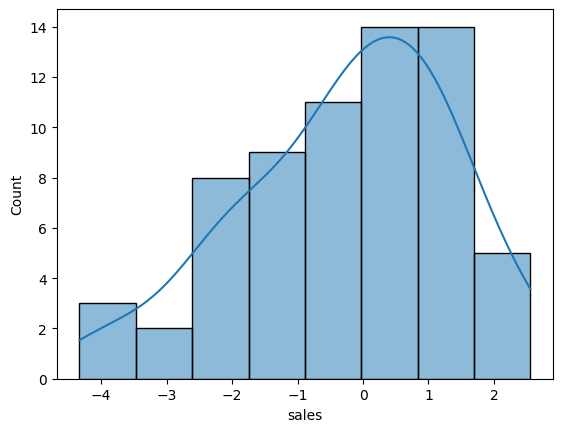

In [87]:
sns.histplot(res,kde=True)

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
np.sqrt(mean_squared_error(y_pred,y_test))

1.6237539513312826